# Actividad 4 - Regresión Multinomial 2

Cargamos los datos y los guardamos en la variable _autos_

In [1]:
library(readxl)
if (.Platform$OS.type=="unix"){ ruta_excel <- "datasets/Autos completo.xlsx"
} else ruta_excel <- "../datasets/Autos completo.xlsx"

autos <- read_excel(ruta_excel, sheet="Sheet1")
head(autos, n=3)

Sexo,Edocivil,Edad,Tam,Origen,Tipo
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
Hombre,Casado(a),34,Grande,Americano,Familiar
Hombre,Soltero(a),36,Compacto,Japonés,Deportivo
Hombre,Casado(a),23,Compacto,Japonés,Familiar


Vemos cómo se distribuyen los datos por tamaño de auto:

In [2]:
autos_m <- autos[autos$Sexo=="Mujer",] # Mujeres
addmargins(table(autos_m$Tam, autos_m$Edocivil))

,Casado(a),Soltero(a),Sum
Compacto,36,22,58
Grande,15,2,17
Mediano,44,19,63
Sum,95,43,138


In [3]:
autos_h <- autos[autos$Sexo=="Hombre",] # Hombres
addmargins(table(autos_h$Tam, autos_h$Edocivil))

,Casado(a),Soltero(a),Sum
Compacto,46,33,79
Grande,15,10,25
Mediano,40,21,61
Sum,101,64,165


Vemos cómo se distribuyen los datos por origen de auto:

In [4]:
autos_m <- autos[autos$Sexo=="Mujer",] # Mujeres
addmargins(table(autos_m$Origen, autos_m$Edocivil))

,Casado(a),Soltero(a),Sum
Americano,42,12,54
Europeo,13,6,19
Japonés,40,25,65
Sum,95,43,138


In [5]:
autos_m <- autos[autos$Sexo=="Hombre",] # Hombres
addmargins(table(autos_m$Origen, autos_m$Edocivil))

,Casado(a),Soltero(a),Sum
Americano,41,20,61
Europeo,13,8,21
Japonés,47,36,83
Sum,101,64,165


Graficamos

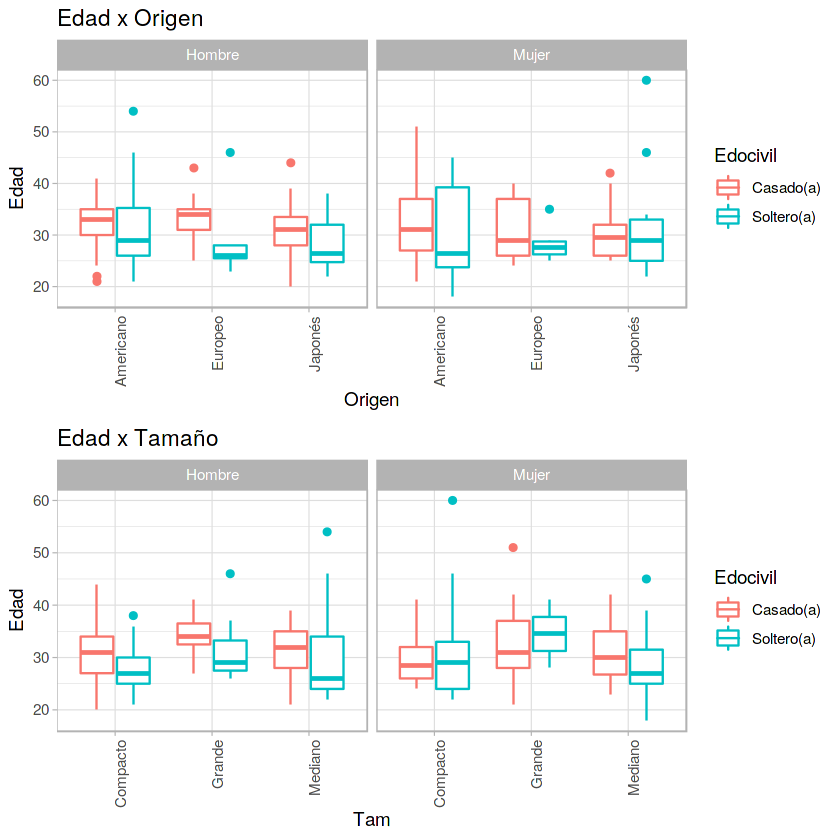

In [6]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))

orig_plot <-ggplot(autos, aes(x=Origen, y=Edad, color=Edocivil)) + 
  geom_boxplot() + theme_light() + labs(title="Edad x Origen") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_grid(.~Sexo)

tam_plot <-ggplot(autos, aes(x=Tam, y=Edad, color=Edocivil)) + 
  geom_boxplot() + theme_light() + labs(title="Edad x Tamaño") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_grid(.~Sexo)

cowplot::plot_grid(plotlist=list(orig_plot, tam_plot), ncol=1)

Establecemos las categorías de referencia para _Edocivil_, _Sexo_, _Tipo_ y _Origen_:

In [7]:
autos$Edocivil <- relevel(as.factor(autos$Edocivil), ref = "Soltero(a)")
autos$Sexo <- relevel(as.factor(autos$Sexo), ref = "Mujer")
autos$Tipo <- relevel(as.factor(autos$Tipo), ref = "Trabajo")
autos$Tam <- relevel(as.factor(autos$Tam), ref = "Grande")
autos$Origen <- relevel(as.factor(autos$Origen), ref = "Japonés")

# Modelo para la variable dependiente _tamaño_

Para este modelo, la variable de referencia es _tamaño = grande_.

Elaboramos la regresión logística multinomial (o politómica) sin interacciones (o modelo sólo con las interacciones principales):

In [8]:
library(nnet)
library(broom)
suppressPackageStartupMessages(library(dplyr))
autos_mlm <- multinom(Tam ~ Edad  + Edocivil + Sexo , data=autos, trace=FALSE)
tidy(autos_mlm, conf.int = TRUE, conf.level = 0.95, exponentiate = TRUE) %>% filter(p.value<=.05)

y.level,term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Compacto,(Intercept),61.2349836,0.99534440,4.133965,3.565582e-05,8.7048424,430.7629057
Compacto,Edad,0.9207504,0.02874327,-2.872541,4.071850e-03,0.8703133,0.9741106
Mediano,(Intercept),31.8944798,0.99578477,3.477090,5.068883e-04,4.5300395,224.5582717
Mediano,Edad,0.9376166,0.02840126,-2.268005,2.332892e-02,0.8868498,0.9912894


Como se puede observar hay significancia entre la edad con el el tamaño compacto y el tamaño mediano.

- Al cambiar en un punto la edad, disminuye la razón de momios entre preferir un tipo de auto compacto ó pequeño, a comparación de un auto de tamaño grande.

 Graficamos los efectos principales de variables Edad, Edo Civil y Sexo:

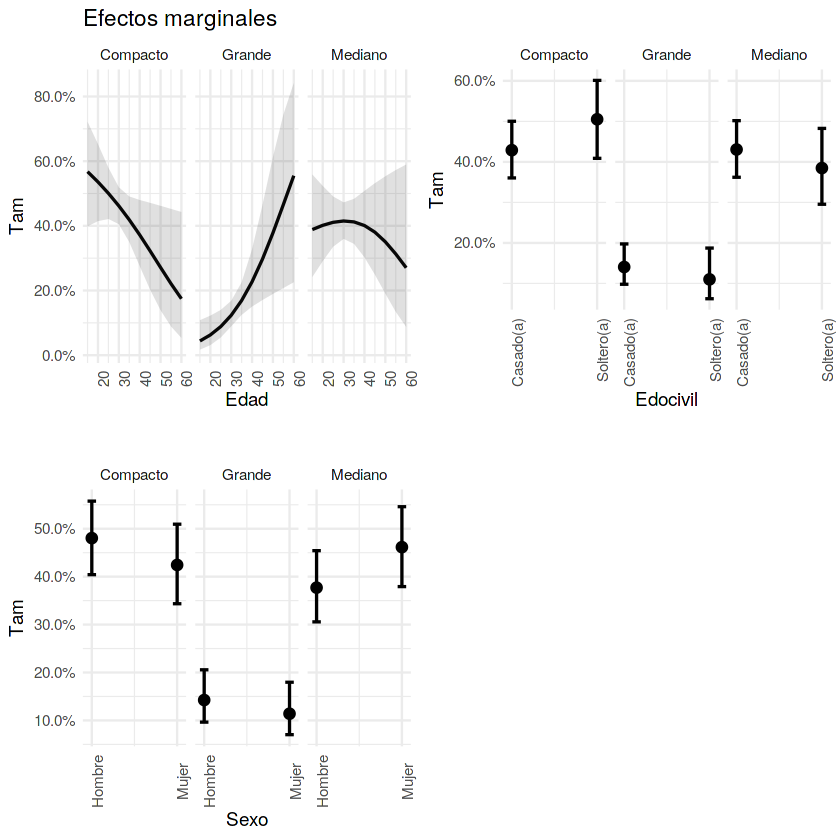

In [9]:
suppressPackageStartupMessages(library(sjPlot))

plot_tipo_edad <- plot_model(autos_mlm, type="eff", title="Efectos marginales")$Edad +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

plot_tipo_edocivil <-plot_model(autos_mlm, type="eff", wrap.labels=-1, title="")$Edocivil + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

plot_tipo_sexo <-plot_model(autos_mlm, type="eff", wrap.labels=-1, title="")$Sexo +
    theme_minimal()  +
    theme(axis.text.x = element_text(angle = 90))

cowplot::plot_grid(plotlist=list(plot_tipo_edad, plot_tipo_edocivil, 
        plot_tipo_sexo), ncol=2)


Las gráficas anteriores tienen el mismo resultado que hacer lo siguiente... pero estas son más bonitas😎

```r
library(effects)
plot(allEffects(autos_mlm))
```

De los gráficos se obtiene:

  - En el gráfico 1: Al incrementarse la edad, se incrementa la probabilidad de preferir los automóviles de tamaño grande y disminuye la preferencia por los autos de tamaño compacto. También vemos que la prob. de preferencia por los autos medianos disminuye, pero no de manera tan pronunciada como los autos compactos.

  - En el gráfico 2: La probabilidad de preferencia por los autos compactos disminuye al haber un cambio entre soltero y casado, mientras que aumenta la prob. preferencia por los autos medianos.
  
  - En el gráfico 3: La probabilidad de preferencia por los autos compactos es mayor entre los hombres que entre las mujeres, mientras lo inverso pasa en la probabilidad de automóviles medianos que tienen mayor prob. de preferencia entre las mujeres que entre los hombres.

# Modelo para la variable dependiente _origen_

Para este modelo, la variable de referencia es _origen = japonés_. Elaboramos la regresión logística multinomial (o politómica) sin interacciones (o modelo sólo con las interacciones principales):

In [10]:
library(nnet)
library(broom)

autos_mlm2 <- multinom(Origen ~ Edad  + Edocivil + Sexo, data=autos, trace=FALSE)
tidy(autos_mlm2, conf.int = TRUE, conf.level = 0.95, exponentiate = TRUE) %>%
    mutate( estimate = round(estimate,6),
        p.value = round(p.value,6), conf.low = round(conf.low, 6),
        conf.high = round(conf.high, 6)
    ) %>% filter(p.value<=.05)

y.level,term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Americano,(Intercept),0.126525,0.69489789,-2.974990,0.002930,0.032410,0.493941
Americano,Edad,1.051334,0.02175213,2.301392,0.021369,1.007454,1.097126
Europeo,(Intercept),0.115173,0.96574398,-2.237984,0.025222,0.017350,0.764529


En este modelo observamos que al aumentar la edad, aumentan la probabilidad de preferencia por un automóvil de origen americano.

Graficamos el modelo:

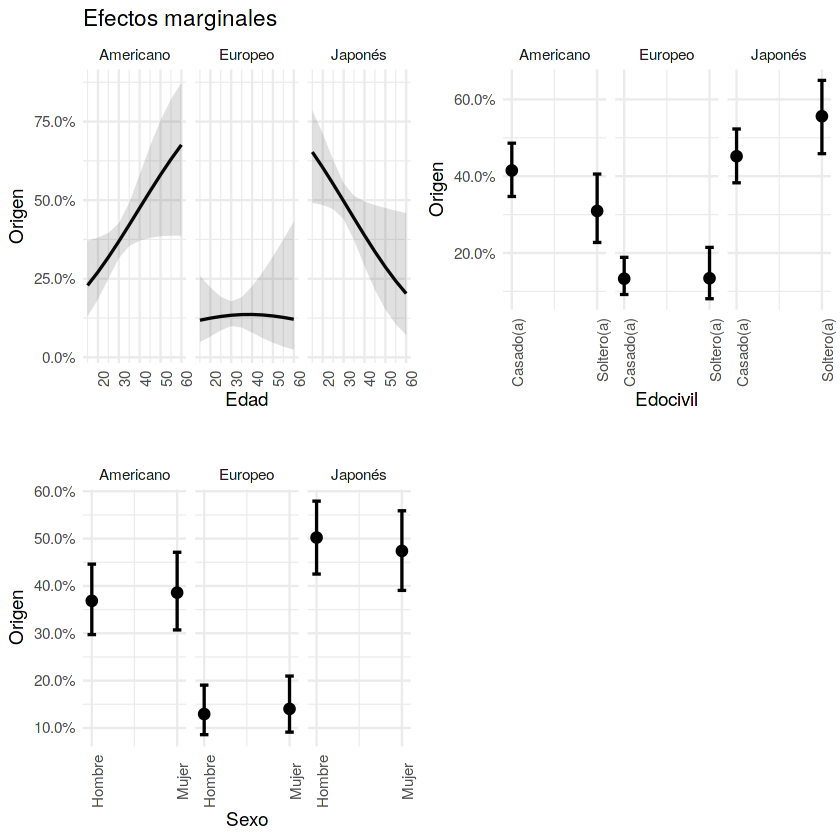

In [11]:
suppressMessages(library(sjPlot))
suppressMessages(library(ggplot2))

plot_tipo_edad <- plot_model(autos_mlm2, type="eff", title="Efectos marginales")$Edad +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

plot_tipo_edocivil <-plot_model(autos_mlm2, type="eff", wrap.labels=-1, title="")$Edocivil + 
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

plot_tipo_sexo <-plot_model(autos_mlm2, type="eff", wrap.labels=-1, title="")$Sexo +
    theme_minimal()  +
    theme(axis.text.x = element_text(angle = 90))

cowplot::plot_grid(plot_tipo_edad, plot_tipo_edocivil, plot_tipo_sexo,
    label_size = 12,
    ncol=2
)

De los gráficos anteriores

  - En el gráfico 1: Al incrementarse la edad, se incrementa la probabilidad de preferir los automóviles de origen _americano_ y disminuye la preferencia por los autos de origen _japonés_. También vemos que la prob. de preferencia por los autos de origen _europeo_ no sufre muchos cambios.

  - En el gráfico 2: La probabilidad de preferencia por los autos japoneses disminuye al haber un cambio entre soltero y casado, mientras que aumenta la prob. preferencia por los autos de origen americano.
  
  - En el gráfico 3: La probabilidad de preferencia por los autos japoneses es mayor entre los hombres, mientras que no hay una diferencia tan significativa entre las probabilidades de preferencia por los autos de otro origen.

# Pruebas de hipótesis de los modelos

Hacemos la prueba de hipótesis para las variables del **primer modelo**:

$H_{0}$: $\beta_{1}=...=\beta_{n}= 0$

$H_{a}$: No existe $\beta_{n} = 0$

In [12]:
suppressPackageStartupMessages(library(car))
round(Anova(autos_mlm, type="III", test="Chisq"),6)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
Edad,8.261941,2,0.016067
Edocivil,1.650813,2,0.438057
Sexo,2.268520,2,0.321660


De lo anterior, vemos que no hay evidencia estadística como para no rechazar la hipótesis nula, por lo que decimos que en el caso del primer modelo sólo la variable _edad_ es significativa.

Ídem para el **segundo modelo**:

In [13]:
round(Anova(autos_mlm2, type="III", test="Chisq"),6)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
Edad,5.453722,2,0.065424
Edocivil,3.411678,2,0.181620
Sexo,0.239908,2,0.886961


De lo anterior, vemos que no hay evidencia estadística como para no rechazar la hipótesis nula, por lo que decimos que en el caso del segundo modelo se repite el caso de que sólo la variable _edad_ es significativa.